### Setup

In [10]:
import importlib
import polars as pl
import matplotlib.pyplot as plt

# Set the font family to Arial
# https://g.co/gemini/share/3898a74b2d77
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial'] # Add Arial to the sans-serif list

plt.rcParams.update({
    'font.size': 20,
})

SAMPLE = '200081' 
PB_CPG_TOOL_MODE = 'model'

pl.Config.set_tbl_rows(25)

from pathlib import Path

IHT_PHASED_DIR = Path('/scratch/ucgd/lustre-labs/quinlan/data-shared/haplotype-maps/CEPH1463.GRCh38')
METH_READ_PHASED_DIR = Path(f'/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.{PB_CPG_TOOL_MODE}.read-backed-phased')

import sys

REPO_DIR = Path('/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry')
sys.path.append(str(REPO_DIR / 'src')) 

REFERENCE_GENOME = "hg38"

TXT_IHT_BLOCKS = f"{IHT_PHASED_DIR}/CEPH1463.GRCh38.iht.sorted.txt" # multi-sample iht blocks file from gtg-ped-map/gtg-concordance

RNG_SEED = 2

## Get methylation levels at CpG sites 

In [11]:
import recombination
importlib.reload(recombination)
from recombination import read_meth_level_wrapper

DF_METH_COMBINED = read_meth_level_wrapper(SAMPLE, METH_READ_PHASED_DIR, PB_CPG_TOOL_MODE)
DF_METH_COMBINED

chrom,start,end,total_read_count,methylation_level
str,i64,i64,i64,f64
"""chr1""",10468,10469,13,0.868
"""chr1""",10470,10471,13,0.878
"""chr1""",10483,10484,13,0.929
"""chr1""",10488,10489,14,0.95
"""chr1""",10492,10493,13,0.964
"""chr1""",10496,10497,14,0.954
"""chr1""",10524,10525,14,0.951
"""chr1""",10541,10542,14,0.956
"""chr1""",10562,10563,14,0.932


## Get recombination blocks

In [12]:
import recombination
importlib.reload(recombination)
from recombination import get_recombination_blocks_both_haplotypes

DF_RECOMBINATION_BLOCKS = get_recombination_blocks_both_haplotypes(SAMPLE, TXT_IHT_BLOCKS)
DF_RECOMBINATION_BLOCKS

chrom,start,end,length,haplotype
str,i64,i64,i64,str
"""chr1""",11698580,11700970,2390,"""mat"""
"""chr1""",16536488,16563167,26679,"""mat"""
"""chr1""",16566537,16566839,302,"""mat"""
"""chr1""",43027272,43027326,54,"""mat"""
"""chr1""",151755205,151755754,549,"""mat"""
"""chr1""",195863905,195866502,2597,"""mat"""
"""chr2""",9047842,9050568,2726,"""pat"""
"""chr2""",46241391,46242316,925,"""mat"""
"""chr2""",100723069,100723353,284,"""mat"""


## Get control intervals: a set of intervals that are outside recombination blocks, but have the same distribution of sizes 

In [13]:
import recombination
importlib.reload(recombination)
from recombination import sample_intervals_from_complement

DF_CONTROL_INTERVALS = sample_intervals_from_complement(
    DF_RECOMBINATION_BLOCKS,
    REFERENCE_GENOME, 
    RNG_SEED
)
DF_CONTROL_INTERVALS

chrom,start,end,length
str,i64,i64,i64
"""chr1""",3338663,3340391,1728
"""chr1""",75278707,75279282,575
"""chr1""",160015044,160015442,398
"""chr2""",39332048,39332350,302
"""chr2""",153900291,153932483,32192
"""chr2""",157098415,157098753,338
"""chr2""",161990354,161990408,54
"""chr2""",175626098,175626644,546
"""chr2""",180878823,180881572,2749


## Get methylation levels in recombination blocks, and in control intervals

In [14]:
import recombination
importlib.reload(recombination)
from recombination import compute_methylation

DF_RECOMBINATION_BLOCKS_WITH_METH = compute_methylation(DF_RECOMBINATION_BLOCKS, DF_METH_COMBINED)
DF_RECOMBINATION_BLOCKS_WITH_METH

chrom,start,end,length,mean_total_read_count,mean_methylation_level,num_cpg_sites,num_cpg_sites_per_bp
str,i64,i64,i64,f64,f64,u32,f64
"""chr1""",11698580,11700970,2390,41.58,0.8345,50,0.020921
"""chr1""",16536488,16563167,26679,98.291667,0.794615,384,0.014393
"""chr1""",16566537,16566839,302,64.666667,0.824667,3,0.009934
"""chr1""",151755205,151755754,549,38.75,0.93425,4,0.007286
"""chr1""",195863905,195866502,2597,40.615385,0.789692,13,0.005006
"""chr2""",9047842,9050568,2726,33.853659,0.92878,41,0.01504
"""chr2""",46241391,46242316,925,46.714286,0.850429,7,0.007568
"""chr2""",111442528,111447313,4785,48.135593,0.798814,59,0.01233
"""chr2""",147887757,147892070,4313,32.868421,0.9125,38,0.008811


In [15]:
DF_CONTROL_INTERVALS_WITH_METH = compute_methylation(DF_CONTROL_INTERVALS, DF_METH_COMBINED)
DF_CONTROL_INTERVALS_WITH_METH

chrom,start,end,length,mean_total_read_count,mean_methylation_level,num_cpg_sites,num_cpg_sites_per_bp
str,i64,i64,i64,f64,f64,u32,f64
"""chr1""",3338663,3340391,1728,24.755556,0.8908,45,0.026042
"""chr1""",160015044,160015442,398,38.428571,0.963286,7,0.017588
"""chr2""",39332048,39332350,302,38.0,0.9485,2,0.006623
"""chr2""",153900291,153932483,32192,42.013072,0.820993,153,0.004753
"""chr2""",175626098,175626644,546,34.6,0.9484,5,0.009158
"""chr2""",180878823,180881572,2749,36.555556,0.762444,9,0.003274
"""chr2""",198851447,198851623,176,27.0,0.307,1,0.005682
"""chr2""",209145953,209146932,979,35.625,0.50225,8,0.008172
"""chr2""",240655785,240655820,35,28.0,0.911,1,0.028571


## Methylation levels appear to be different in recombination blocks relative to control intervals (but not significant for a single sample)

Kolmogorov-Smirnov test:
Maximum absolute difference between CDFs: 0.0906
p-value: 7.8546e-01

Mann-Whitney U test:
U statistic: 4319.5000
p-value: 5.7774e-01


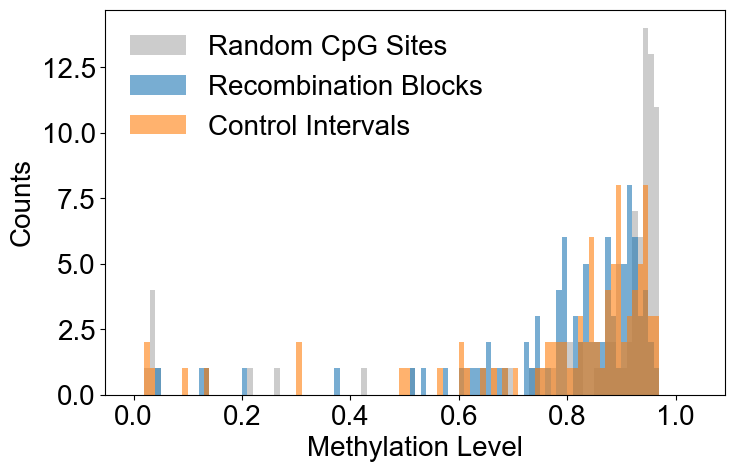

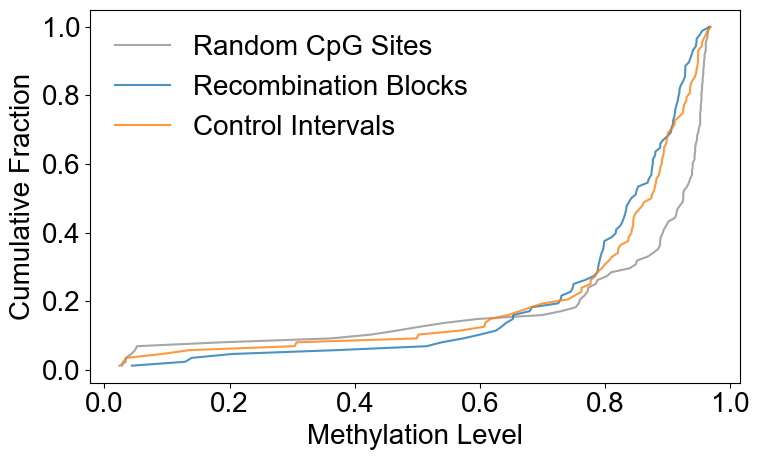

In [16]:
import recombination
importlib.reload(recombination)
from recombination import (
    run_statistical_tests,
    plot_histograms,
    plot_cdf
)

run_statistical_tests(DF_RECOMBINATION_BLOCKS_WITH_METH, DF_CONTROL_INTERVALS_WITH_METH)

plot_histograms(
    DF_RECOMBINATION_BLOCKS_WITH_METH, 
    DF_CONTROL_INTERVALS_WITH_METH, 
    column="mean_methylation_level", 
    xlabel="Methylation Level", 
    df_meth=DF_METH_COMBINED
)

plot_cdf(
    DF_RECOMBINATION_BLOCKS_WITH_METH, 
    DF_CONTROL_INTERVALS_WITH_METH, 
    column="mean_methylation_level", 
    xlabel="Methylation Level", 
    df_meth=DF_METH_COMBINED
)

## [TODO] Methylation levels are significantly different between recombination blocks and control intervals, when multiple samples are pooled

In [17]:
# TODO: 
# 1. read in control_intervals_methylation.csv and recomb_blocks_methylation.csv in analysis directory
# 2. run statistical tests, plot histograms, and cdf

## [TODO] Signal to even stronger when methylation is assessed in a haplotype-dependent manner


In [18]:
# TODO: 
# compute methylation levels on the flanks of the block on the corresponding parental haplotype, 
# and ask whether that is significantly different from control intervals